In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


# Ejercicio para Practicar

Sos un data scientist que trabaja para una empresa de publicidad que lanzo una campaña de publicidad en una red social. 
Se registró cada usuario al que se le mostró la publicidad, y se pudo obtener datos de la persona tales como 
`genero`, `edad` y `salario estimado`. Además se registró si el usuario luego compró el producto que la publicidad 
hacia referencia. Los datos están en `Social_Network_Ads.csv`. Se busca poder predecir dado un usuario con datos 
socioeconómicos si va a comprar o no el producto.


In [2]:
Ads_df = pd.read_csv("./datasets/Social_Network_Ads.csv")

In [3]:
Ads_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [4]:
Ads_df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
Ads_df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [6]:
Ads_df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

## Primeros comentarios

Tenemos un dataset pequeño de unas 400 observaciones en donde las clases están bastante balanceadas (35% compro el producto), esto no pasaba en el dataset del default visto en clase. Podemos ver también que esta bastante balanceada la relación de género, y viendo el describe, no parece haber muchos datos outliers. Por lo que por ahora seguiremos el estudio sin hacer un filtrado.

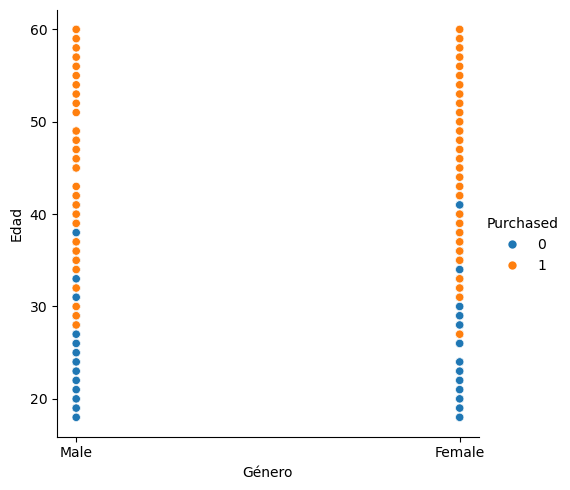

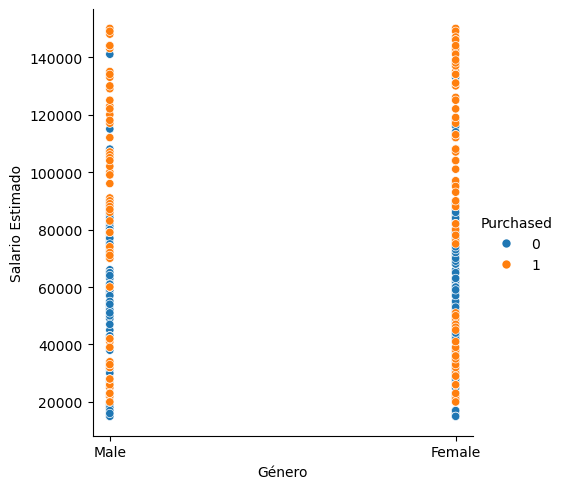

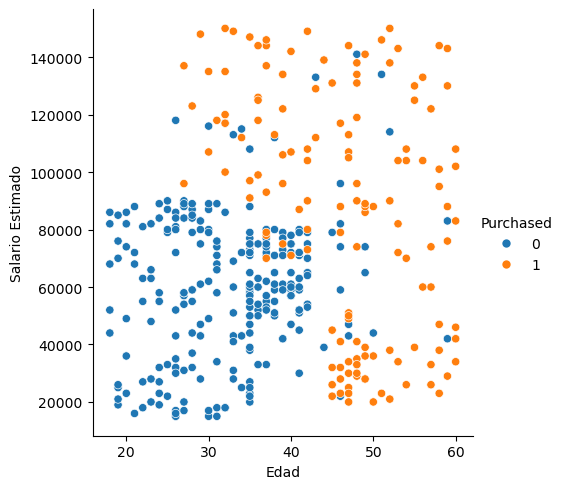

In [7]:
#Hacemos esto para poder graficar y poder visualizar mejor
df_sample_no_purchased = Ads_df[Ads_df["Purchased"] == 0].copy()
df_sample_purchased = Ads_df[Ads_df["Purchased"] == 1].copy()
#Genero vs Edad
g = sns.relplot(data=pd.concat([df_sample_no_purchased, df_sample_purchased]), x="Gender", y="Age", hue="Purchased", 
                kind="scatter", legend=True)
plt.xlabel("Género")
plt.ylabel("Edad");
#Genero vs Salario
g = sns.relplot(data=pd.concat([df_sample_no_purchased, df_sample_purchased]), x="Gender", y="EstimatedSalary", hue="Purchased", 
                kind="scatter", legend=True)
plt.xlabel("Género")
plt.ylabel("Salario Estimado");
#Edad vs Salario
g = sns.relplot(data=pd.concat([df_sample_no_purchased, df_sample_purchased]), x="Age", y="EstimatedSalary", hue="Purchased", 
                kind="scatter", legend=True)
plt.xlabel("Edad")
plt.ylabel("Salario Estimado");

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

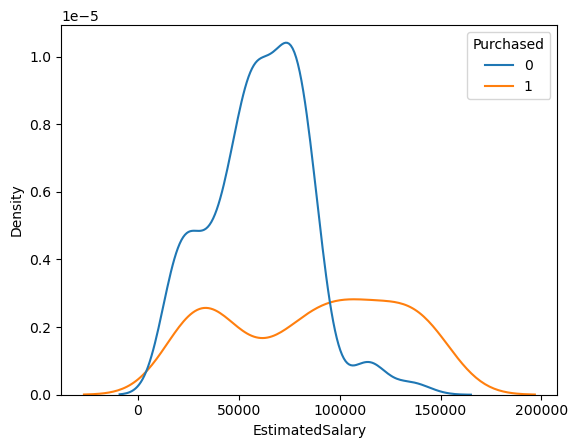

In [8]:
sns.kdeplot(data=Ads_df, x="EstimatedSalary", hue='Purchased')


<Axes: xlabel='Age', ylabel='Density'>

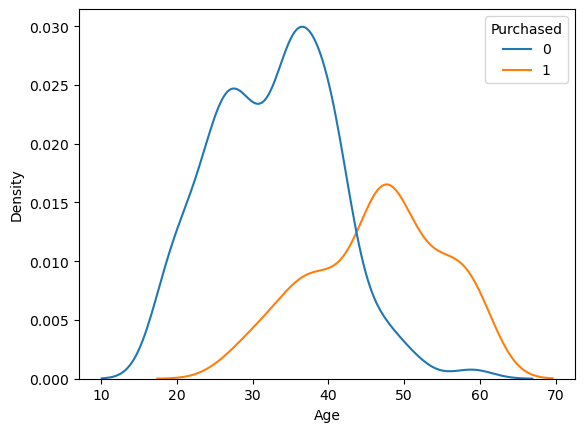

In [9]:
sns.kdeplot(data=Ads_df, x="Age", hue='Purchased')

En los últimos dos gráficos se puede observar una clara relación entre la edad y el salario estimado con la compra o no del producto, en particular con el scatter de edad y salario se puede observar dos zonas del mapa en donde se distingue claramente si no se compro (menos de 40 años y un salario de menos de 90000) y el resto donde se compró. A primera vista se puede intuir que un modelo KNN podría predecir de buena manera.

## 2.

Separe dataset en entrenamiento y validación.

In [10]:
#Cambiar datos de genero a valores numericos 1 Male y 0 Female
Ads_df["Gender"] = Ads_df["Gender"].apply(lambda x: 1 if x == "Male" else 0)
Ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    int64  
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 15.8 KB


In [11]:
X = Ads_df.loc[:, ["Age", "Gender", "EstimatedSalary"]]
y = Ads_df.loc[:, ["Purchased"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

## Modelo de regresión logística



In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model_logistic = LogisticRegression(random_state = 0, class_weight="balanced")
model_logistic.fit(X_train, y_train)

c:\Users\magui\anaconda3\envs\Inteligencia_Artificial\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', random_state=0)

In [15]:
y_pred = model_logistic.predict(X_test)

# Creamos la matriz de confusión
cm_logistic = confusion_matrix(y_test, y_pred)

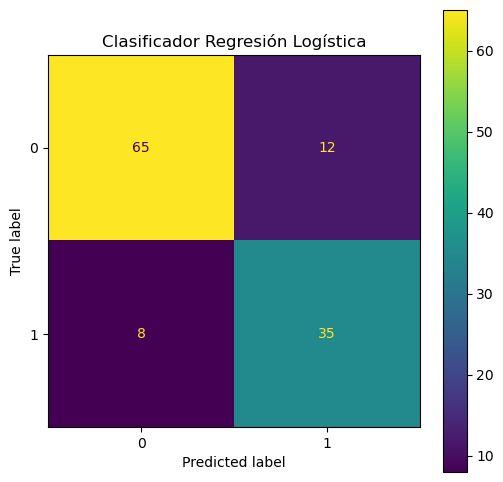

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic,
                              display_labels=model_logistic.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Regresión Logística");

In [17]:
# Midamos la sensibilidad y especificidad
print("Clasificador Regresión Logística")
P = np.sum(cm_logistic[1, :])
N = np.sum(cm_logistic[0, :])
TP = cm_logistic[1, 1]
TN = cm_logistic[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

Clasificador Regresión Logística
Sensibilidad: 0.813953488372093
Especificidad: 0.8441558441558441
Exactitud balanceada: 0.8290546662639686
Precision: 0.7446808510638298
Recuperación: 0.813953488372093
F1-score: 0.7777777777777778


## Clasificador KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors=23, metric="minkowski", p=2)
classifier_knn.fit(X_train, y_train)

c:\Users\magui\anaconda3\envs\Inteligencia_Artificial\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=23)

In [19]:
#Evaluamos
y_pred  = classifier_knn.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred)

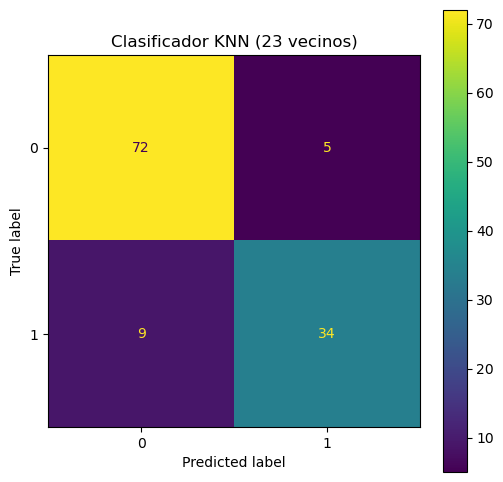

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=classifier_knn.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador KNN (23 vecinos)");

In [21]:
# Midamos la sensibilidad y especificidad
print("Clasificador KNN (23 vecinos)")
P = np.sum(cm_knn[1, :])
N = np.sum(cm_knn[0, :])
TP = cm_knn[1, 1]
TN = cm_knn[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

Clasificador KNN (23 vecinos)
Sensibilidad: 0.7906976744186046
Especificidad: 0.935064935064935
Exactitud balanceada: 0.8628813047417698
Precision: 0.8717948717948718
Recuperación: 0.7906976744186046
F1-score: 0.8292682926829267


El modelo KNN se comportó mejor al disminuir los casos de FP, lo cual es razonable con el scatter visto al principio. Los usuarios que no realizaron la compra se encuentran mucho más agrupados, por lo que es menos posible predecir como positivo un valor negativo, de esta manera la mejora en la precisión y la disminución en la recuperación eran esperables. Sin embargo, por el tipo de dataset la precisión aumentó mucho y la recuperación disminuyó poco. 

In [22]:
X = Ads_df.loc[:, ["EstimatedSalary", "Age"]].values
y = Ads_df.loc[:, "Purchased"].values
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

sc_X = StandardScaler()
X_train_two = sc_X.fit_transform(X_train_two)

classifier_knn_two = KNeighborsClassifier(n_neighbors=23, metric="minkowski", p=2)
classifier_knn_two.fit(X_train_two, y_train_two)

KNeighborsClassifier(n_neighbors=23)

C:\Users\magui\AppData\Local\Temp\ipykernel_8876\3319312918.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


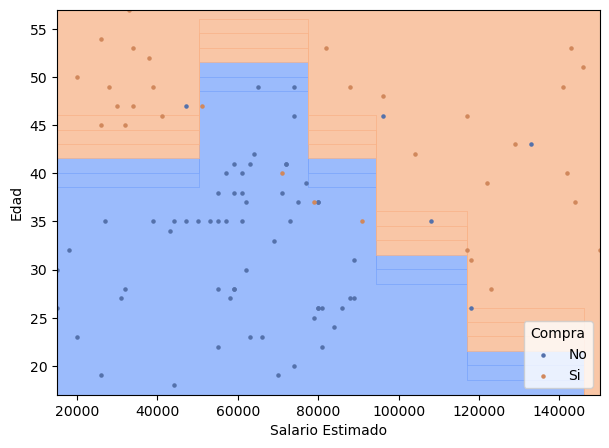

In [23]:
from matplotlib.colors import ListedColormap

# Crear la malla de puntos para el gráfico
X_set, y_set = X_test_two, y_test_two
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=10),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=10)
)

X_cont = sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)

# Crear el gráfico de contorno
plt.figure(figsize=(7, 5))
plt.contourf(
    X1, X2, classifier_knn_two.predict(X_cont).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('#7aa5fb', '#f8b389'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de entrenamiento
lab = ["No", "Si"]
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('#5471ab', '#d1885c'))(i), label=lab[i],
        s=5
    )

plt.xlabel('Salario Estimado') 
plt.ylabel('Edad') 
plt.legend(title="Compra")

plt.show()

## Curva ROC
Sckikit-learn tambien nos provee de estas métricas, tanto para crear la [curva ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) como calcular el [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc):

In [24]:
# predict_proba() Nos permite obtener la probabilidad. Como tenemos dos clases, nos devuelve la probabilidad de las dos clases
# Nos quedamos con la clase 1 (que es la que nos importa)
prob = model_logistic.predict_proba(X_test)[:, -1]


In [25]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, _ = roc_curve(y_test, prob)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


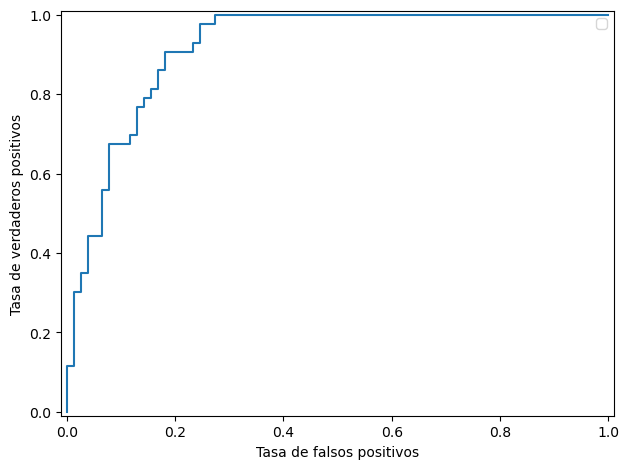

In [26]:
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout();

In [27]:
print(f"Modelo todos los atributos AUC: {auc(fpr, tpr)}")

Modelo todos los atributos AUC: 0.917849592268197


In [28]:
# Busquemos el threshold para el modelo con todos los atributos
fpr_total, tpr_total, thr_total = roc_curve(y_test, prob)

# Viendo la curva ROC parece que el mejor valor para tomar umbral es 0.2
value_tpr = np.max(tpr_total[fpr_total < 0.2])
threshold_selected = thr_total[(tpr_total == value_tpr) & (fpr_total < 0.2)]

# Clasifiquemos con este nuevo valor
prob_total = model_logistic.predict_proba(X_test)[:, -1]
y_pred_total_new = (prob_total >= threshold_selected).astype(float)
print("Clasificador logistico")
print(f"Precision: {precision_score(y_test, y_pred_total_new, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred_total_new, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred_total_new, zero_division=0)}")

cm_total = confusion_matrix(y_test, y_pred_total_new)
P = np.sum(cm_total[1, :])
N = np.sum(cm_total[0, :])
TP = cm_total[1, 1]
TN = cm_total[0, 0]
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")

Clasificador logistico
Precision: 0.7358490566037735
Recuperación: 0.9069767441860465
F1-score: 0.8124999999999999
Sensibilidad: 0.9069767441860465
Especificidad: 0.8181818181818182


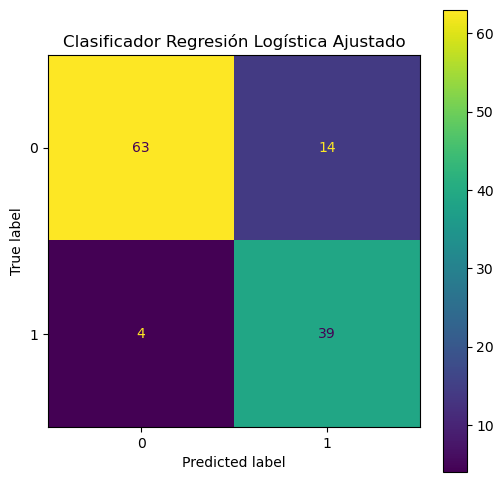

In [29]:
# Creamos la nueva matriz de confusión
cm_logistic = confusion_matrix(y_test, y_pred_total_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic,
                              display_labels=model_logistic.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Regresión Logística Ajustado");

De esta manera mejore mi f1-score y algunos de  otros parámetros.

Entonces lo que hicimos fue elegir cuanto era mi "máximo" de falsos positivos que quería que mi modelo , a partir de el valor más cercano al (1,1) de la curva ROC, en este caso el umbral es 0,2. 

Matemáticamente mi modelo de la Curva de regresión logística le dije al modelo que en lugar de tomar +0.5 para predecir como 1, que tomará mi Threshold_Selected en este caso 0.45.

#### Grafico de frontera de decisión

Me tomo los features de age y salary para hacer una frontera de decisión:

In [30]:
X = Ads_df.loc[:, ["Age", "EstimatedSalary"]].values
y = Ads_df.loc[:, "Purchased"].values
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Normalizamos
sc_X = StandardScaler()
X_train_two = sc_X.fit_transform(X_train_two)  

# Entrenamos el modelo por máxima verosimilitud
classifier_two = LogisticRegression(random_state = 0, class_weight="balanced")
classifier_two.fit(X_train_two, y_train_two)

LogisticRegression(class_weight='balanced', random_state=0)

In [31]:
# Crear la malla de puntos para el gráfico
X_set, y_set = X_test_two, y_test_two
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=1)
)

X_cont = sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)

C:\Users\magui\AppData\Local\Temp\ipykernel_8876\781359259.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


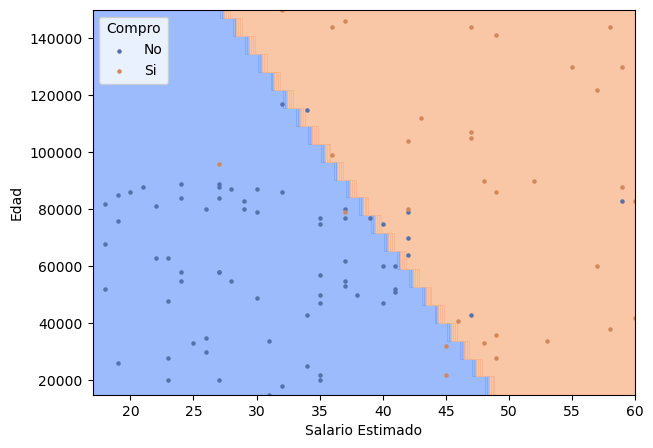

In [32]:
from matplotlib.colors import ListedColormap

# Crear el gráfico de contorno
plt.figure(figsize=(7, 5))
plt.contourf(
    X1, X2, classifier_two.predict(X_cont).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('#7aa5fb', '#f8b389'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de entrenamiento
lab = ["No", "Si"]
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('#5471ab', '#d1885c'))(i), label=lab[i],
        s=5
    )

plt.xlabel('Salario Estimado') 
plt.ylabel('Edad') 
plt.legend(title="Compro")

plt.show()

## Búsqueda de hiper-parámetros por búsqueda de grilla o aleatorio.

Empecemos con las búsquedas más sencillas. Estos métodos están implementados en scikit-learn y son útiles para explorar el espacio de hiperparámetros de manera exhaustiva o aleatoria.

La búsqueda de grilla consiste en definir una cuadrícula de valores para cada hiperparámetro que se desea optimizar, y luego evaluar exhaustivamente el rendimiento del modelo para 
cada combinación posible de valores. Aunque esta estrategia puede ser efectiva para espacios de búsqueda pequeños o cuando se tienen recursos computacionales limitados, puede volverse 
prohibitivamente costosa en espacios de búsqueda más grandes.

En este caso vamos a buscar hiper-parámetros del clasificador k-NN. Vamos a usar la distancia de Minkowski, ya que variando su coeficiente podemos calcular cualquier tipo de distancia.

Vamos a realizar la búsqueda con una validación cruzada de 3-Fold y maximizar el Score F1:

In [33]:
from sklearn.model_selection import GridSearchCV

classifier_knn = KNeighborsClassifier()

hyperparams = {"n_neighbors": np.arange(1, 30),    # Cantidad de vecinos.
               "weights": ["uniform", "distance"],  # Como se pesa los votos
               "p": np.arange(1.0, 30.0)}              # Valores para la distancia de Minkowski

# Creamos un método de busqueda por grilla:
grid = GridSearchCV(classifier_knn,
                    hyperparams,
                    refit=False,
                    cv=3,
                    scoring='f1',
                    n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29.]),
                         'weights': ['uniform', 'distance']},
             refit=False, scoring='f1')

In [34]:
grid.best_params_

{'n_neighbors': 3, 'p': 1.0, 'weights': 'distance'}

In [35]:
best_knn_grid = KNeighborsClassifier(**grid.best_params_)
best_knn_grid.fit(X_train, y_train)

c:\Users\magui\anaconda3\envs\Inteligencia_Artificial\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3, p=1.0, weights='distance')

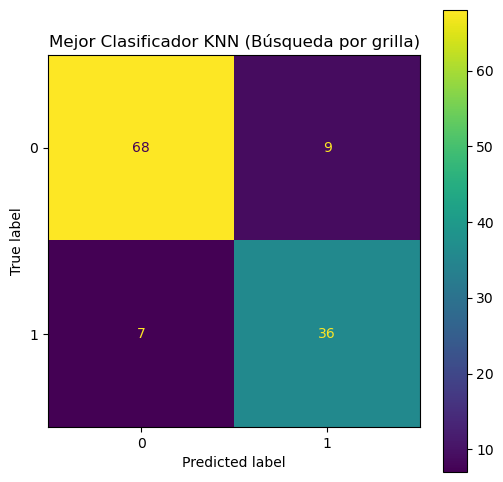

In [36]:
#Evaluamos
y_pred  = best_knn_grid.predict(X_test)

cm_best_knn_grid = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn_grid,
                              display_labels=best_knn_grid.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Mejor Clasificador KNN (Búsqueda por grilla)");

In [37]:
# Midamos varias métricas:
print("Mejor Clasificador KNN (Búsqueda por grilla)")
P = np.sum(cm_best_knn_grid[1, :])
N = np.sum(cm_best_knn_grid[0, :])
TP = cm_best_knn_grid[1, 1]
TN = cm_best_knn_grid[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

Mejor Clasificador KNN (Búsqueda por grilla)
Sensibilidad: 0.8372093023255814
Especificidad: 0.8831168831168831
Exactitud balanceada: 0.8601630927212323
Precision: 0.8
Recuperación: 0.8372093023255814
F1-score: 0.8181818181818183


Aca no entendí por qué el F1-score con los mejores parametros me da menor que el primero que probe de manera aleatoria.

## Ejercicio Clase 3 

In [38]:
from sklearn.svm import SVC

In [41]:
svm_Ads = SVC()

grid = GridSearchCV(svm_Ads,
                    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
                    refit=True,
                    cv=5,
                    scoring='f1')
# Ajustar la forma de y_train
y_train = np.ravel(y_train)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 100],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'gamma': [0.1, 0.5, 1, 2, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']}],
             scoring='f1')

In [43]:
grid.best_params_

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}

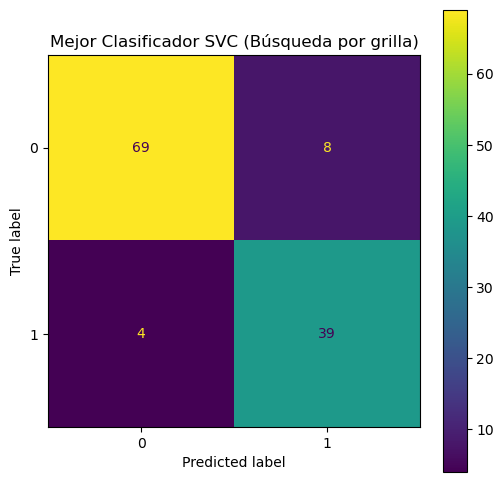

In [44]:
svc_best = grid.best_estimator_

#Evaluamos
y_pred  = svc_best.predict(X_test)

cm_svc_best = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc_best,
                              display_labels=svc_best.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Mejor Clasificador SVC (Búsqueda por grilla)");

In [46]:
# Midamos varias métricas:
print("Mejor Clasificador S (Búsqueda por grilla)")
P = np.sum(cm_svc_best[1, :])
N = np.sum(cm_svc_best[0, :])
TP = cm_svc_best[1, 1]
TN = cm_svc_best[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

Mejor Clasificador S (Búsqueda por grilla)
Sensibilidad: 0.9069767441860465
Especificidad: 0.8961038961038961
Exactitud balanceada: 0.9015403201449712
Precision: 0.8297872340425532
Recuperación: 0.9069767441860465
F1-score: 0.8666666666666666


El modelo SVC mejora significativamente en todas las métricas de medición.
